In [1]:
from models_cv import *
from normalizer import *
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
car = pd.read_csv('../data/measurements_model.csv')
car.head()

,distance,consume,speed,gas_SP98,temp_inside,temp_outside,AC,rain,snow,sun,trip_price
0,28.0,5.0,26,0,21.5,12,0,0,0,0,6.900
1,12.0,4.2,30,0,21.5,13,0,0,0,0,5.796
2,11.2,5.5,38,0,21.5,15,0,0,0,0,7.590
3,12.9,3.9,36,0,21.5,14,0,0,0,0,5.382
4,18.5,4.5,46,0,21.5,15,0,0,0,0,6.210


In [3]:
sp95 = car[car.gas_SP98 == 0]
sp95.drop(['gas_SP98'], axis=1, inplace=True)

sp98 = car[car.gas_SP98 == 1]
sp98.drop(['gas_SP98'], axis=1, inplace=True)

In [4]:
to_normal = ['distance', 'speed', 'temp_outside']
cv = 18

## Posible solución

Tras revisar el problema y los datos con los que contamos, considero que una posible forma de plantearlo es intentar construir un modelo de predicción de consumos para ambos tipos de gasolina. 

Al ser una compañía de taxis bajo demanda, en todo momento vamos a tener controlados datos como la distancia del trayecto, la velocidad media que ese trayecto tendrá, la temperatura exterior, si el trayecto se realizará con lluvia, sol o nada reseñable, y si nuestros conductores tendrán o no el aire acondicionado encendido.

Con estos datos, nuestros modelos podrán predecir qué consumo registrarían nuestros vehículos para cada situación específica con ambos tipos de gasolina, y de este modo tomar decisiones sobre qué tipo de gasolina utilizar dependiendo de la estación del año, el trayecto y demás. De este modo podríamos tener coches asignados para según qué tareas específicas y demás.

### Selección de variables

Al analizar las correlaciones hemos visto que algunas variables están altamente correlacionadas, por lo que podrían interferir en nuestro modelo. 

Voy a probar dos tipos de modelo: el primero eliminando la variables trip_price y temp_inside, y el segundo eliminando además sun, rain y snow. De esta forma compararé resultados y veré qué modelo predice mejor.

### Modelo 1 (sin trip_price y temp_inside)

#### SP98

Vamos a eliminar primero las columnas, para analizar después la distribución de los datos 

In [5]:
sp98_1 = sp98.drop(['trip_price', 'temp_inside'], axis=1)

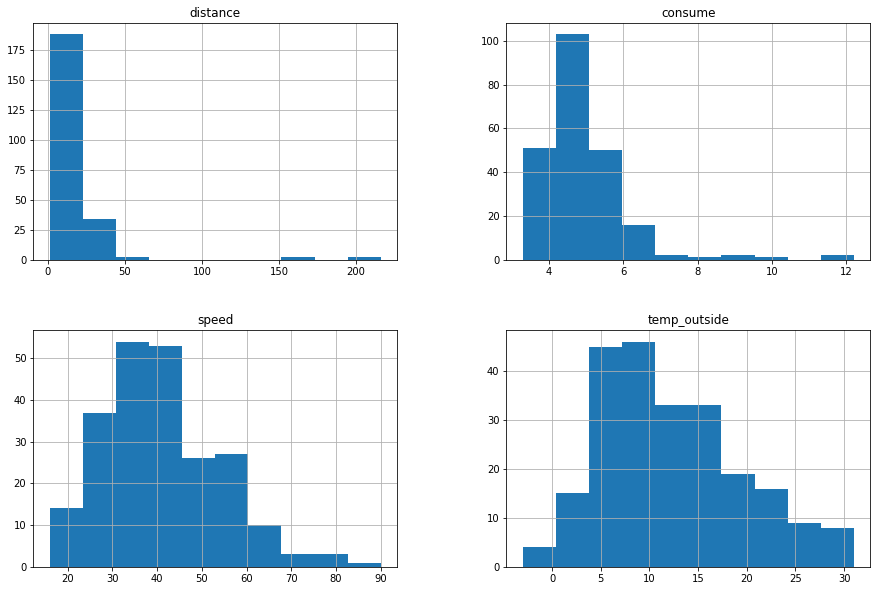

In [6]:
sp98_1[['distance', 'consume', 'speed', 'temp_outside']].hist(figsize=(15,10));

Como se aprecia en los gráficos, las distribuciones para las variables distance, consume y speed tienen bastante cola a la derecha, mientras que temp_outside sí que parece un poco más normal. Dicho esto, aplicaré la normalización en distance y speed, ya que consume es la variable a predecir.

#### Normalización

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (228). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


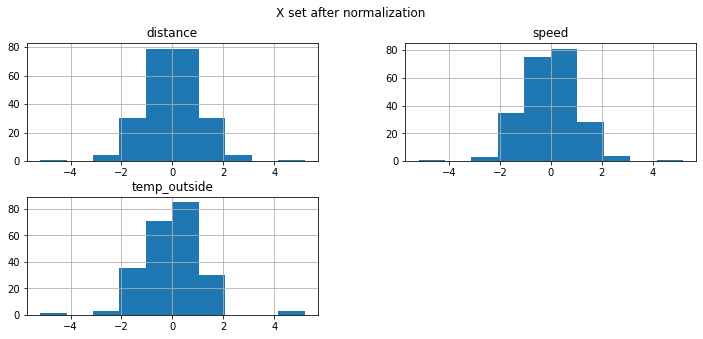

In [7]:
X98_1, y98_1 = normalizer(sp98_1, to_normal)

Las distribuciones parecen más normales ahora. Esto hará que los modelos trabajen mucho mejor.

In [8]:
results98_1 = modeling(X98_1, y98_1, cv)

#### SP95

In [9]:
sp95_1 = sp95.drop(['trip_price', 'temp_inside'], axis=1)

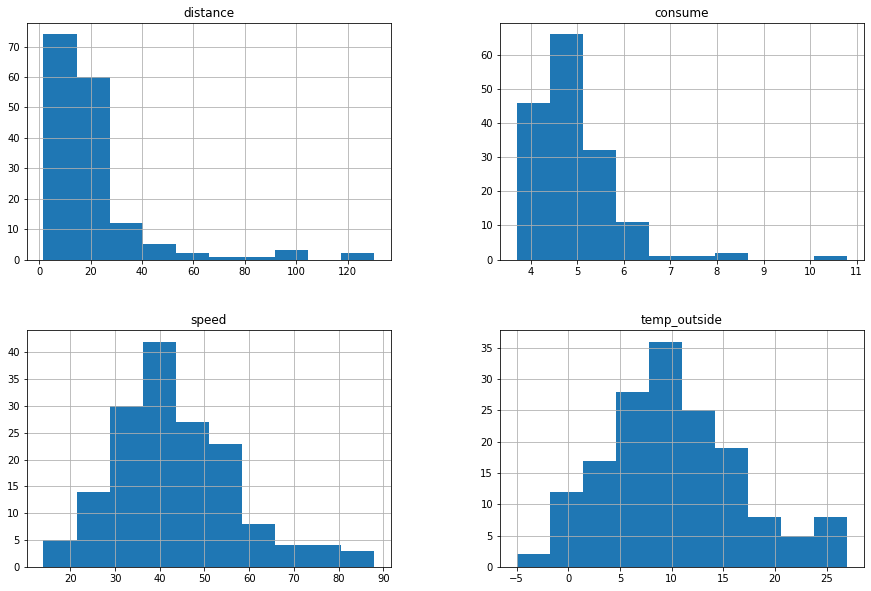

In [10]:
sp95_1[['distance', 'consume', 'speed', 'temp_outside']].hist(figsize=(15,10));

Como se aprecia en los gráficos, las distribuciones para las variables distance, consume y speed tienen bastante cola a la derecha, mientras que temp_outside sí que parece un poco más normal. Dicho esto, aplicaré la normalización en distance y speed, ya que consume es la variable a predecir.

#### Normalización

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (160). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


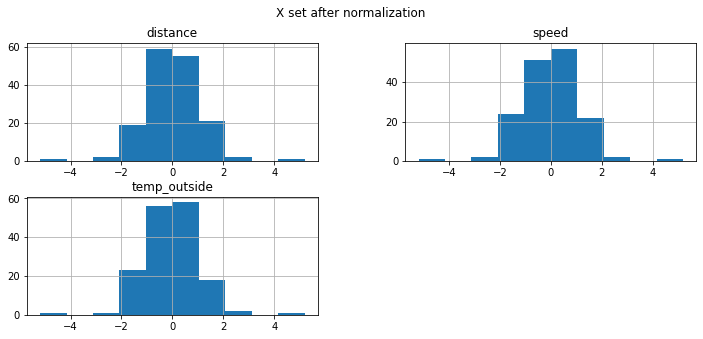

In [11]:
X95_1, y95_1 = normalizer(sp95_1, to_normal)

In [12]:
results95_1 = modeling(X95_1, y95_1, cv)

### Modelo 2 (sin trip_price, temp_inside, sun, rain y snow)

#### SP98

In [13]:
sp98_2 = sp98.drop(['trip_price', 'temp_inside', 'sun', 'rain', 'snow'], axis=1)

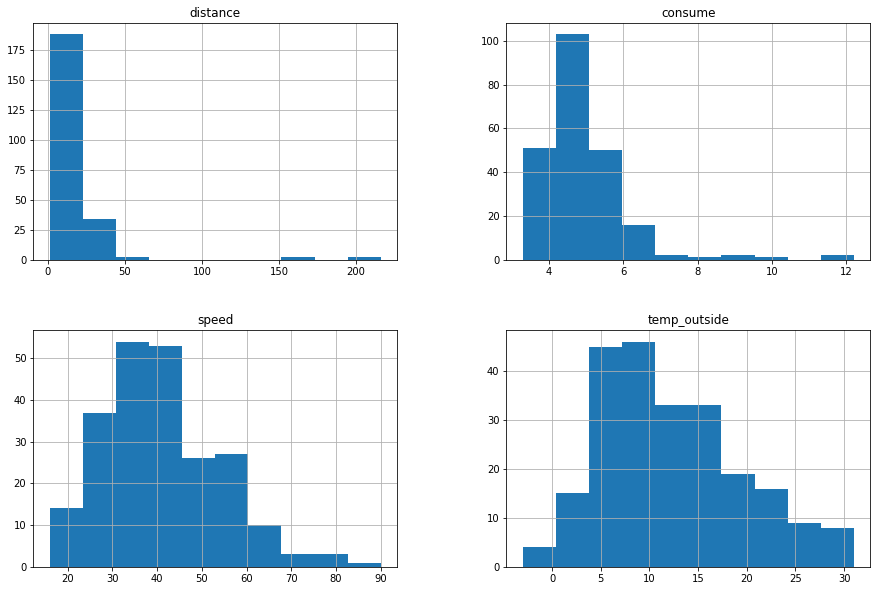

In [14]:
sp98_2[['distance', 'consume', 'speed', 'temp_outside']].hist(figsize=(15,10));

#### Normalización

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (228). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


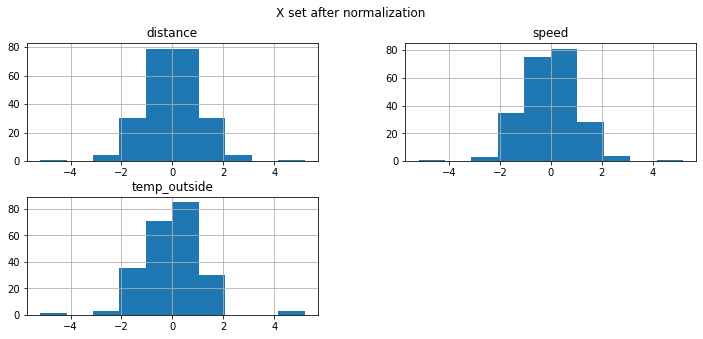

In [15]:
X98_2, y98_2 = normalizer(sp98_2, to_normal)

In [16]:
results98_2 = modeling(X98_2, y98_2, cv)

#### SP95

In [17]:
sp95_2 = sp95.drop(['trip_price', 'temp_inside', 'sun', 'rain', 'snow'], axis=1)

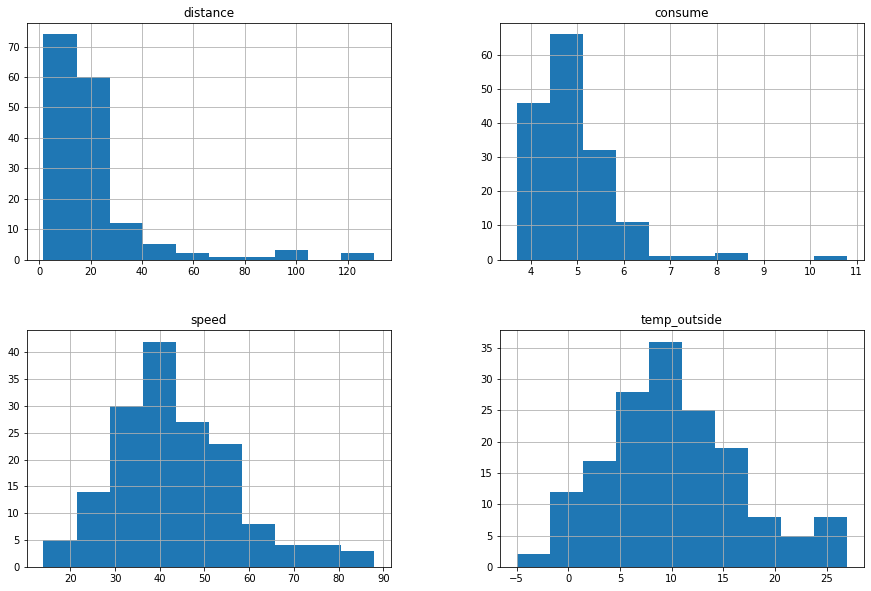

In [18]:
sp95_2[['distance', 'consume', 'speed', 'temp_outside']].hist(figsize=(15,10));

#### Normalización

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (160). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


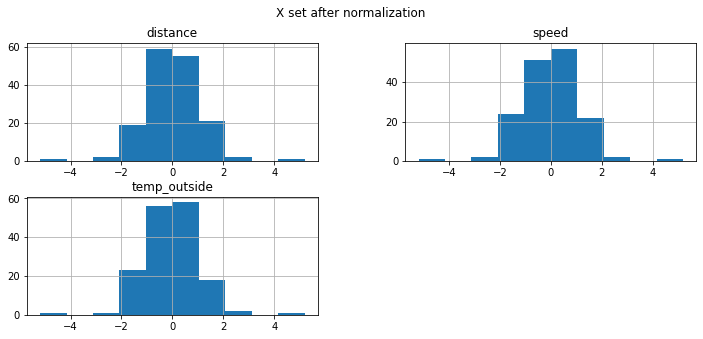

In [19]:
X95_2, y95_2 = normalizer(sp95_2, to_normal)

In [20]:
results95_2 = modeling(X95_2, y95_2, cv)

### Resultados de los modelos

#### SP98

In [21]:
results98_1.sort_values('RMSE')

,model,RMSE,standard_dev
2,Random Forest Regressor,0.655322,-0.294051
5,Gradient Boost Regression,0.681949,-0.325138
6,XGboost Regression,0.710744,-0.286516
7,K Nearest Neighbors,0.754553,-0.477202
1,Decission Tree,0.786489,-0.359858
3,Support Vector Machine,0.816786,-0.500835
4,Ridge Regression,0.889467,-0.431621
0,Linear Regression,0.889874,-0.431398


In [22]:
results98_2.sort_values('RMSE')

,model,RMSE,standard_dev
2,Random Forest Regressor,0.655466,-0.290363
5,Gradient Boost Regression,0.684714,-0.319893
6,XGboost Regression,0.700176,-0.287562
7,K Nearest Neighbors,0.736869,-0.440768
3,Support Vector Machine,0.753488,-0.479739
1,Decission Tree,0.817607,-0.340577
4,Ridge Regression,0.901875,-0.416633
0,Linear Regression,0.902219,-0.416432


#### SP95

In [23]:
results95_1.sort_values('RMSE')

,model,RMSE,standard_dev
2,Random Forest Regressor,0.577525,-0.254229
5,Gradient Boost Regression,0.592761,-0.215573
6,XGboost Regression,0.620912,-0.220072
7,K Nearest Neighbors,0.686583,-0.383362
3,Support Vector Machine,0.719237,-0.330120
1,Decission Tree,0.741355,-0.326054
4,Ridge Regression,0.788295,-0.298824
0,Linear Regression,0.925971,-0.607398


In [24]:
results95_2.sort_values('RMSE')

,model,RMSE,standard_dev
2,Random Forest Regressor,0.572171,-0.253387
6,XGboost Regression,0.599947,-0.262720
5,Gradient Boost Regression,0.610428,-0.257059
7,K Nearest Neighbors,0.661567,-0.320223
3,Support Vector Machine,0.677946,-0.313498
1,Decission Tree,0.726298,-0.229764
4,Ridge Regression,0.772717,-0.292545
0,Linear Regression,0.773160,-0.292369


Tras probar hasta 8 modelos distintos, aplicando Cross Validation en cada uno de ellos para asegurar que las metricas devueltas son fiables, los resultados señalan que el mejor modelo de regresión posible a implementar será el Random Forest Regressor para todos los casos.

En cuanto a las variables a eliminar, parece que los resultados de los modelos no varían demasiado, por ello considero oportuno mantener el primer modelo, en el cual sólo me deshago de las variables trip_price y temp_inside.

Modelo y dataset definitivos serán entrenados en otro Notebook.

In [25]:
sp98_1.to_csv('random_forest/sp98.csv', index=False)
sp95_1.to_csv('random_forest/sp95.csv', index=False)